# Lesson 1b: Basic Neural Network with Keras

In this lesson you will build a small neural network in Keras and train it to replicate the logical XOR function.

As before, fill in the marked _TODO_'s in the code cells and answer any questions asked in the indicated text cells.

You should be able to complete this exercise imitating what we did in class, possibly augmented with some consultation of the Chollet book and/or the Keras official documentation.  If you get stuck or turned around, ask on Piazza.  We're at early stages with these tools, so they probably won't feel familiar or comfortable yet.  In time, you'll find yourself becoming quite fluent with them.

## Getting Started: Make Sure We Have a GPU Available

As we mentioned in class, the availability of high performance GPUs and TPUs is one of the factors that
led to the post 2006 renaissance in neural networks and helped make possible the practical use of deep neural networks. 

Our class VMs are equipped with GPUs, as we'll now verify.

In [1]:
# We'll mostly train models with Keras in this class, and the Keras API is included in
# recent versions of the TensorFlow framework. Keras can also be used as an easy to use
# front end to many other deep learning backends.

import tensorflow as tf
tf.__version__

2023-08-01 22:43:06.650608: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 22:43:21.034929: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/compilers_and_libraries_2018.1.163/linux/tbb/lib/intel64_lin/gcc4.7:/opt/intel/compilers_and_libraries_2018.1.163/linux/compiler/lib/intel64_lin:/opt/intel/compilers_and_libraries_2018.1.163/linux/mkl/lib/intel64_lin::/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64/
2023-08-01 22:43:21.035086: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not

'2.11.0'

In [2]:
# !pip3 install tensorflow --user

You'll probably see some warnings when you run the above cell for the first time.
The warnings are harmless, but if you want to do some Googling to try to figure out
what they mean, and what they're trying to tell us, you might find that a good exercise.

In [3]:
# We'll ask the TensorFlow framework to tell us what resources are available to
# train models with...

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2163774486710634431
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15247015936
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14107570520479040778
physical_device_desc: "device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0"
xla_global_id: 416903419
]


2023-08-01 22:43:30.690450: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 22:43:39.931993: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /device:GPU:0 with 14540 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


You should see an Nvidia Tesla GPU, along with the VM's CPU in the above output.
An interesting side exercise might be to Google the type of Nvidia GPU and see
where it stacks up in terms of its cost and performance, relative to other GPUs
in the Nvidia product line.

You'll probably see some additional, harmless warnings, as well.

## Imports

In [4]:
# Some imports we'll need for plots and visualizations. Watch for
# where and how they get used below.
%matplotlib inline
from IPython.display import SVG

# Imports of various things from Keras and NumPy. You might want to
# have the Keras documentation and the Chollet book handy while you
# go through this cell so you can familiarize yourself with these
# creatures...
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.regularizers import l2
from keras.utils import model_to_dot
import math
import numpy as np

import matplotlib.pyplot as plt

## Create Dataset for the Logical XOR Function

In [5]:
# Recall the truth table for XOR. We'll make training data where the
# inputs to XOR are the model features and the labels are the values
# XOR outputs for a given input.
data_X = np.array([[0, 0],
                   [1, 0],
                   [0, 1],
                   [1, 1]])
data_y = np.array([0, 
                   1, 
                   1, 
                   0])

## Build the Neural Net Model

In [6]:
# Create a Sequential Keras model
model = Sequential() # TODO: Create a Sequential Keras model

# Add a Dense layer to your model with:
#    2 units
#    the input shape set to vectors of length 2
#    that activation set to 'sigmoid'
#    the kernel_initializer set to 'glorot_normal'
#    the kernel_regularizer set to l2(0.0001)
#
# We'll say a lot more about activations, initialization, and regularization
# very soon.  For now, the above choices should serve you pretty well.
model.add(Dense(2, 
                input_shape=(2,), # TODO: Note the possibly funny shape here
                activation='sigmoid',  # TODO: Set activation type
                kernel_initializer='glorot_normal', # TODO: Set initialization type
                kernel_regularizer='l2')) # TODO: Set regulization type

2023-08-01 22:43:41.060739: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14540 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


In [7]:
# We can always ask Keras to describe nearly just what we've packed
# into our neural architecture.  Let's do so now...
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


Notice that Keras has told us what layers our architecture contains, and how many parameters,
both trainable and not trainable, our model contains. So far in class we've probably only seen
trainable parameters, but we'll later encounter types of layers that don't have trainable
parameters.

# Question 1: 
How many parameters are there in the model so far? Why? Explain in detail what each parameter represents. Answer in the cell below.

(You might find it useful to revisit our discussion of example models in lecture and look at some of the pictures and countings of parameters that we did)

### Answer 1
_TODO_ Answer:
- How many parameters are there in total in the model?
    There are 6.
- What are each of the parameters?
    (2 input values + 1 bias) x 2 units = 6 parameters

## Add another layer

In [8]:
# Add a Dense layer with:
#   1 unit
#   activation set to 'sigmoid'
#   kernel_initializer set to 'glorot_normal'
#

model.add(Dense(1, 
                activation='sigmoid', # TODO: Set activation
                kernel_initializer='glorot_normal')) # TODO: Set initialization

In [9]:
# Let's recheck the shape of our evolving model...
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## Question 2: 
How many new parameters are there now (e.g., how many were added after question 1)? Why? What does each new parameter represent? 

### Answer 2

_TODO_ Answer:
- How many parameters are there in the entire model after the next layer was added?
    9
- What are each of the parameters?
    6 are explained in the previous question for the 1st layer.
    For the second layer added, it's (2 input values + 1 bias) x 1 unit from Dense layer = 3 parameters making it a total of 9 parameters.

## Visualize the model

In [10]:
# We'll need to install the following python package to let Keras
# give us nice visualizations of our networks.
# !pip3 install pydot --user

# IMPORTANT NOTE: pydot depends on the Graphviz tool being installed on our
#                 VM.  By default it might not be. To install it, open another
#                 SSH connection to your VM, connecting as the 'mlearn' user,
#                 using the password from your welcome mail, and at the VM's
#                 shell run:
#
#                        sudo apt install graphviz
#
#                 You should see some downloads happen and get a success
#                 confirmation.  Once you've done that, keep working forward...

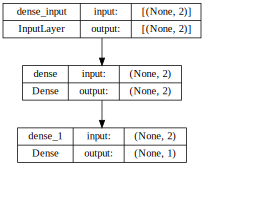

In [11]:
# Now let's use pydot and the SVG package we imported earlier to
# visualize our neural network...
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Train the Model

In [16]:
# model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Recall the 'compile' method on your model configures your network
# architecture for use by specifying things like what optimizer to use
# We'll soon see various improvements on the gradient descent you're
# probably familiar with.  Various optimizers have configurable
# hyperparameters including the learning rate, and more.  You also
# need to tell Keras what loss function you're trying to optimize,
# and what metrics you want to track during training.
#
# If your recollection is fuzzy, now might be a good time to review
# the meanings of Accuracy and Mean Squared Error.  Don't worry too
# much about whatever 'Adam' is for now---just think of it as "an
# alternative to gradient descent that can work better sometimes,"
# and we'll talk more about alternative optimization algorithms later.
#
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=.01)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])

### Modify the Steps per Epoch, Number of Epochs, Etc. Below as Needed. The Goal Should Be 100% Accuracy for the XOR Data.

In [13]:
# In Keras, you train a model that you've compiled by running 'fit' on it.

# You may need to fool around with values passed to fit() to get to 100% accuracy.  I'd suggest ignoring
# steps_per_epoch since our training set is so preposterously small.  Also, remember that the
# training process involves randomization, so you may see different results on different runs.
# The model we've built is powerful enough to simulate XOR well, but depending on hyperparameter
# choices during training, and some amount of luck of the draw, it may take some fiddling to
# get to 100%.
#
# We'll talk more about the details of such concerns in short order.  For now, we're just trying
# to get your feet wet with using Keras to train a model that perceptrons couldn't do, but that
# neural networks with one hidden layer can do (though sometimes with a bit of cajoling).
#
model.fit(data_X, data_y,
          epochs=500) # Note: different random initial conditions require different # of epochs. The output results in acc 1.000

Epoch 1/500


2023-08-01 22:48:23.343130: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1db93720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-01 22:48:23.343168: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla V100-PCIE-16GB, Compute Capability 7.0
2023-08-01 22:48:23.685422: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-01 22:48:26.651756: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 14s 14s/step - loss: 0.2659 - accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2647 - accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 13ms/step - loss: 0.2635 - accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2624 - accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2613 - accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2603 - accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2593 - accuracy: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2585 - accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2576 - accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2569 - accuracy: 0.5000
Epoch 11/500
1/1 [=====================

1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 85/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 86/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 87/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 88/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 89/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 90/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 91/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 92/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 93/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 94/500
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.2500
Epoch 168/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.2500
Epoch 169/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.2500
Epoch 170/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.2500
Epoch 171/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.2500
Epoch 172/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.2500
Epoch 173/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2500 - accuracy: 0.2500
Epoch 174/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2500 - accuracy: 0.2500
Epoch 175/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 176/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.7500
Epoch 177/500
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 250/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 251/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 252/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 253/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 254/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 255/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 256/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.7500
Epoch 257/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.7500
Epoch 258/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.7500
Epoch 259/500
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 332/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 333/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 334/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 335/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 336/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 337/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 338/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 339/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 340/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 341/500
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 414/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 415/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 416/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 417/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 418/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 419/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 420/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 421/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 422/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 423/500
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 496/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 497/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 498/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 499/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000
Epoch 500/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5000


Once you've finally hit an accuracy of 1.0000, look at how many epochs it took to reach that result.  Also note how the loss function decreased across the epochs.  We'll soon see nicer ways of monitoring these things during training, stopping at a good time and not wasting additional epochs past the point of diminishing returns, and so on.

For now, just beat the model into submission on the XOR problem.

# Run the trained model on the dataset.

In [15]:
predictions = model.predict(data_X)
predictions

1/1 [==============================] - 0s 19ms/step


array([[0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

Stop and interpret the result of the above cell.  Each component of the vector is the model's output, through
its final sigmoid activation for one of the rows of the XOR truth table.

Now might be a good time to review the sigmoid function and logistic regression if the model's predictions on the four lines of the truth table feel hard to interpret after you've hit 100% training accuracy.

# Question 3:
Explain the results of the predict() call above. How well did the trained model do on this problem?

### Answer 3

_TODO_ Fill this cell in with your answer.
I haven't been able to get accuracy up to 1.0 or 100%. The maximum I can get is 0.75. But the 0.5 makes sense in terms of model not overfitting and knowing that XOR gate is not linearly separable. All my predictions are predicted as false. 2 are right and 2 are wrong (the first and the last).

In [17]:
# Let's clean up our outputs a bit...

data_y # The labels of our training samples, i.e. the rows of XOR's truth table

array([0, 1, 1, 0])

In [18]:
# Apply the threshold of 0.5 to the predictions of the model.
#    Note the Python idiom below if you've either not seen it before,
#    or if it has slipped your mind.
#
#    You can apply a boolean producing condition to a NumPy array
#    to produce an array of the same shape, full of the boolean
#    results of the test you used.
booleanized_predictions = predictions > .5

print(booleanized_predictions)

[[False]
 [False]
 [False]
 [False]]


# Question 4:
Print the weights of both layers of the trained network below. HINT: model.layers gives a list of layers. layer.get_weights() returns layer weights.

In [20]:
model.layers[0].get_weights() # TODO: Get the weights for the 0-th layer of your model

[array([[ 6.7885519e-13,  1.7377950e-12],
        [-9.5739345e-13, -5.8048392e-12]], dtype=float32),
 array([ 0.174032  , -0.17904732], dtype=float32)]

In [21]:
model.layers[1].get_weights() # TODO: Get the weights for the 1-st layer of your model

[array([[-0.74651235],
        [ 1.3095394 ]], dtype=float32),
 array([-0.1906547], dtype=float32)]